In [87]:
import random as rd
from typing import Tuple
from matplotlib import pyplot as plt
import numpy as np
import cmath 



# Q3

In [31]:
def dragonk (a1:complex,a2:complex,a3:complex,v: float, s3:float) -> Tuple[complex,complex,complex]:
    
    i = complex(0,1)
    a1t = a1 + a2*a3
    a2t = v*a2 - a1*np.conj(a3) 
    a3t = v*a3 - a1*np.conj(a2) + i*s3*a3
    
    return (a1t,a2t,a3t)

A partir dessa equação, iremos usar o método de rk4 partindo de condições iniciais para fazer os cálculos numéricos desse sistema de equações:


In [32]:
def rk4 (x: complex, y: complex, z: complex, v: float,s3:float, n: int,  dt: float) -> Tuple[complex,complex,complex]:
    for i in range (n):
        (xa,ya,za) = dragonk(x,y,z,v,s3)
        (xb,yb,zb) = dragonk(x+dt*0.5*xa,y+dt*0.5*ya,z+dt*0.5*za,v,s3)
        (xc,yc,zc) = dragonk(x+dt*0.5*xb,y+dt*0.5*yb,z+dt*0.5*zb,v,s3)
        (xd,yd,zd) = dragonk(x+dt*xc,y+dt*yc,z+dt*zc,v,s3)
        x = x + dt/6*(xa + 2*xb + 2*xc + xd)
        y = y + dt/6*(ya + 2*yb + 2*yc + yd)
        z = z + dt/6*(za + 2*zb + 2*zc + zd)
        yield (x,y,z)

#dt = tamanho do passo de integração
#n = número de pontos (x,y,z) que são calculados

In [85]:
def plot2(v,s3,n,n_inic,dt,N,s):
    rd.seed(s)
    for i in range(N):
        a1 = complex(rd.uniform(0,1),rd.uniform(0,1))
        a2 = complex(rd.uniform(0,1),rd.uniform(0,1))
        a3 = complex(rd.uniform(0,1),rd.uniform(0,1))
        (A1,A2,A3) = zip(*rk4(a1,a2,a3,v,s3,n,dt))
        plt.plot(np.absolute(A1[n_inic:]), np.absolute(A2[n_inic:]), 'k-')
    plt.xlabel('|A1|')
    plt.xlim(0,50)
    plt.ylabel('|A2|')
    plt.title('Fig 2.b')
    plt.show()
    
    return

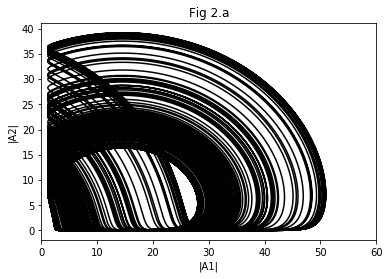

In [82]:
v=-14.5 #parameter c3 that is being changed
s3 = 2.2
s=2 #seed for reproductiveness of the simulation
n = 500000 #number of time points for simulation
dt = 0.0005 #interval between points for numerical calculus
N = 1 #number of initial points
n_inic = 10000 # number of points that are disconsidered for the plot
plot2(v,s3,n,n_inic,dt,N,s)

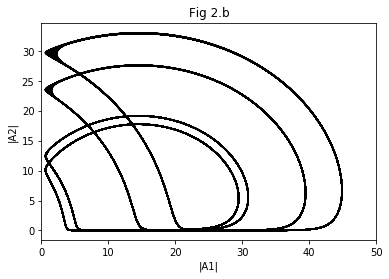

In [86]:
v=-14.5 #parameter c3 that is being changed
s3 = 1.1
s=2 #seed for reproductiveness of the simulation
n = 50000 #number of time points for simulation
dt = 0.005 #interval between points for numerical calculus
N = 1 #number of initial points
n_inic = 10000 # number of points that are disconsidered for the plot
plot2(v,s3,n,n_inic,dt,N,s)